# Accessing data from NASA Astrophysics Archives Using Python

NASA missions have collected a huge amount of data spanning a large range in wavelengths. These data are housed in four different archives: the HEASARC, MAST, IRSA, NED. However, different physical locations are not an obstacle for astronomers doing multiwavelength science projects that need to make use of data from different archives. The archives have been working together to make sure that you don’t need to know too much about us to get the data you need to work together. We’ve done this by standardizing the way that programs can access the data we house. Since python is a very popular programming language, we are going to use it to show you how you can take advantage of this standardization to put together and analyze a multiwavelength data set. For this workshop, we are using a sample of interacting galaxies, and we will assemble a multiwavelength data set for it. You can generalize this example to much larger data sets of your own.

## What kinds of data sets are available?

Many data sets are public.

NED: google for galaxies
HEASARC: High Energy
MAST: optical, near-infrared
IRSA: far-infrared, submillimeter

## Basic Principals of asking for data

1. Discover the data
2. Create Search URLs
3. Send URLs to archives with Python
4. Parse results
5. Fetch images or analyze catalog data

## The sample: Nearby Interacting Galaxies

In [3]:
from astropy.io import ascii
list_of_galaxies = ascii.read('interacting_gals.csv', delimiter=',')  
print(list_of_galaxies)                       

   ra     dec  
------- -------
9.90704 8.96507
19.0186 46.7304
20.2887 40.4703
125.886 21.3377
136.002 21.9679
141.057 40.6372
  146.7 22.0116
148.785 14.2922
149.751 17.8168
175.039  15.327
    ...     ...
241.519 20.8014
317.088 18.2002
329.235 6.64845
 333.83 37.3012
335.756 30.9249
344.396 19.7827
348.682 4.53407
 350.39 27.1181
350.438 9.07761
357.827 20.5778
0.36165 31.4334
Length = 30 rows


## What does NED know about these galaxies?

In [6]:
import requests
import io
from astropy.table import Table
import urllib.parse
ned_base_url = 'http://vo.ned.ipac.caltech.edu'
search_radius = 5.0 / 3600.0
i = 0
for galaxies in list_of_galaxies:
    print(' ')
    print(i)
    position = str(galaxies['ra'])+','+str(galaxies['dec'])
    ned_objects_url = ned_base_url + '/services/querySED?REQUEST=queryData&POS='+position+'&SIZE='+str(search_radius)
    ned_objects_response = requests.get(ned_objects_url)
    if ned_objects_response.status_code == 200:
        ned_objects_table = Table.read(io.BytesIO(ned_objects_response.content))
        #ned_targetname_url = ned_base_url+urllib.parse.quote(ned_objects_table[0]['ACREF'].decode("utf-8"), safe = '/,&,?,=')
        ned_targetname_url = ned_base_url+urllib.parse.quote(ned_objects_table[0]['ACREF'], safe = '/,&,?,=')
        if len(ned_objects_table) > 0: 
            ned_data_response = requests.get(ned_targetname_url)
            if ned_data_response.status_code == 200:
                ned_data_table = Table.read(io.BytesIO(ned_data_response.content))
                print(ned_data_table['DataSpectralPassBand'])
    i = i + 1

    

 
0


DataSpectralPassBand
--------------------
      FUV (GALEX) AB
      FUV (GALEX) AB
      NUV (GALEX) AB
      NUV (GALEX) AB
                 m_p
             B (m_B)
           B (m_B^0)
                   I
                   I
  J_14arcsec (2MASS)
                   J
                   J
                   H
  H_14arcsec (2MASS)
                   H
                 K_s
K_s_14arcsec (2MASS)
                 K_s
 
1
DataSpectralPassBand
--------------------
                 m_p
   V (Johnson) (OAN)
   R (Cousins) (OAN)
   I (Cousins) (OAN)
                   J
  J_14arcsec (2MASS)
                   J
  H_14arcsec (2MASS)
                   H
                   H
K_s_14arcsec (2MASS)
                 K_s
                 K_s
  4.5 microns (IRAC)
  4.5 microns (IRAC)
  5.8 microns (IRAC)
  5.8 microns (IRAC)
  8.0 microns (IRAC)
  8.0 microns (IRAC)
              1.4GHz
 
2
DataSpectralPassBand
--------------------
                 m_p
                   J
                   J
  J_1

DataSpectralPassBand
--------------------
                J_pg
                F_pg
                   J
  J_14arcsec (2MASS)
                   J
  H_14arcsec (2MASS)
                   H
                   H
K_s_14arcsec (2MASS)
                 K_s
                 K_s
 
22
DataSpectralPassBand
--------------------
      FUV (GALEX) AB
      FUV (GALEX) AB
      NUV (GALEX) AB
      NUV (GALEX) AB
 
23
DataSpectralPassBand
--------------------
      FUV (GALEX) AB
      FUV (GALEX) AB
      NUV (GALEX) AB
      NUV (GALEX) AB
 
24
DataSpectralPassBand
--------------------
      FUV (GALEX) AB
      FUV (GALEX) AB
      FUV (GALEX) AB
      FUV (GALEX) AB
      NUV (GALEX) AB
      NUV (GALEX) AB
      NUV (GALEX) AB
      NUV (GALEX) AB
                   J
  J_14arcsec (2MASS)
                 ...
K_s_14arcsec (2MASS)
  3.6 microns (IRAC)
  3.6 microns (IRAC)
  4.5 microns (IRAC)
  4.5 microns (IRAC)
  5.8 microns (IRAC)
  5.8 microns (IRAC)
  8.0 microns (IRAC)
  8.0 microns (IRAC

# Find Base URL for AllWISE

In [8]:
tap_params = {
    "request":"doQuery",
    "lang":"ADQL",
    "query":"""
        select b.short_name, c.access_url from rr.capability a 
        natural join rr.resource b 
        natural join rr.interface c
        where a.cap_type='simpleimageaccess' and b.short_name like 'AllWISE%' 
        order by short_name;
    """
    }

r = requests.post('https://vao.stsci.edu/RegTAP/TapService.aspx/sync', data = tap_params)
table=Table.read(io.BytesIO(r.content))
table.pprint(max_width=-1,max_lines=-1)

 short_name                          access_url                         
----------- ------------------------------------------------------------
AllWISE L3a https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?


# Generalize to Find Base URLs for WISE, GALEX, SWIFT, SEIP, 2MASS

In [10]:
missions = ['AllWISE', 'GALEX', 'SWIFTUVOT', 'SEIP', '2MASS']
base_urls = [' ', ' ', ' ', ' ', ' ']
i = 0 #ask shupe if this is the right way to do this.
for mission in missions:
    mission_string = "'"+mission+"%'"
    query = "select b.short_name, c.access_url from rr.capability a natural join rr.resource b natural join rr.interface c where a.cap_type='simpleimageaccess' and b.short_name like "+mission_string+"order by short_name;"
   
    tap_params = {
        "request":"doQuery",
        "lang":"ADQL",
        "query": query
        }

    r = requests.post('https://vao.stsci.edu/RegTAP/TapService.aspx/sync', data = tap_params)
    table=Table.read(io.BytesIO(r.content))
    base_urls[i] = table['access_url'][0]
    i = i + 1
search_list = Table([missions, base_urls], names = ('mission', 'base_url'))
search_list.pprint(max_width=-1)
    

 mission                                                                         base_url                                                                       
--------- ------------------------------------------------------------------------------------------------------------------------------------------------------
  AllWISE                                                                                           https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?
    GALEX                                                                              http://mast.stsci.edu/portal/Mashup/VoQuery.asmx/SiaV1?MISSION=GALEX&amp;
SWIFTUVOT                                                                                       https://heasarc.gsfc.nasa.gov/xamin/vo/sia?table=swiftuvlog&amp;
     SEIP https://irsa.ipac.caltech.edu/cgi-bin/Atlas/nph-atlas?mission=SEIP&amp;hdr_location=%5CSEIPDataPath%5C&amp;SIAP_ACTIVE=1&amp;collection_desc=SEIP&amp;
    2MASS                         

# Replace 2MASS and Swift and SEIP entries with the correct ones

  http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?POS=0,0

        Ask Shupe how to do this in a better way
        index = (table['energy_bandpassname'] == 'W1') & (table['access_format'] == 'image/fits        ')

In [20]:
search_list['base_url'][4] = 'http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?'
search_list['base_url'][2] = 'https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl&survey=swiftuvvot'

search_list.pprint(max_width=-1)

 mission                                                                         base_url                                                                       
--------- ------------------------------------------------------------------------------------------------------------------------------------------------------
  AllWISE                                                                                           https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?
    GALEX                                                                              http://mast.stsci.edu/portal/Mashup/VoQuery.asmx/SiaV1?MISSION=GALEX&amp;
SWIFTUVOT                                                                                      https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl&survey=swiftuvvot
     SEIP https://irsa.ipac.caltech.edu/cgi-bin/Atlas/nph-atlas?mission=SEIP&amp;hdr_location=%5CSEIPDataPath%5C&amp;SIAP_ACTIVE=1&amp;collection_desc=SEIP&amp;
    2MASS                         

# Remove SEIP and swiftuvot rows until we know a correct version of it and know how to deal with extra parameters.

In [21]:
search_list.remove_row(3)
search_list.remove_row(2)
search_list.pprint(max_width=-1)

mission                                  base_url                                
------- -------------------------------------------------------------------------
AllWISE              https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?
  GALEX http://mast.stsci.edu/portal/Mashup/VoQuery.asmx/SiaV1?MISSION=GALEX&amp;
  2MASS               http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?


In [113]:
from astropy.table import Table, Column
import shutil
import ntpath

# Define the position and search size (degrees).
ra = '185.47873'
dec = '4.47365'

size = '0'  # Means the image must contain the search point

base_url = 'http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?'

params = {'POS': ra + ',' + dec,
          'SIZE': size
         }

r = requests.get(base_url, params)
#table=Table.read(io.BytesIO(r.content))
#table.pprint(max_width=-1)
#print(table['sia_url']) #sia_bp_id
for key in table.columns:
    col = table.columns[key]
    ucdval = col.meta.get('ucd')
    print(ucdval)
 

VOX:Image_Title
VOX:Image_AccessReference
VOX:Image_Naxes
VOX:Image_Format
POS_EQ_RA_MAIN
POS_EQ_DEC_MAIN
VOX:Image_Naxis
VOX:WCS_CoordRefPixel
VOX:WCS_CoordRefValue
VOX:WCS_CoordProjection
VOX:Image_Scale
VOX:WCS_CDMatrix
VOX:BandPass_ID
VOX:BandPass_RefValue
VOX:BandPass_LoLimit
VOX:BandPass_HiLimit
None
None
None
None
None
None
None
None
None
None
None


# For a given search position, loop through this image list

In [120]:
from astropy.table import Table, Column
import shutil
import ntpath

# Define the position and search size (degrees).
ra = '185.47873'
dec = '4.47365'

size = '0'  # Means the image must contain the search point

base_url = search_list['base_url'][1]

params = {'POS': ra + ',' + dec,
          'SIZE': size
         }

i = 0
# Dictionary to collect result tables
downloaded_images = Table(names=('mission', 'imagename'), dtype=('S10', 'S50'))
downloaded_images['mission'] = ['newnewnew']
downloaded_images['imagename'] = ['image.fits']
keys = ['access_url', 'access_url', 'access_url'] #ask shupe if this is the right way to do this.
for base_url in search_list['base_url']:
    print(' ')
    print(base_url)
    r = requests.get(base_url, params)
    table=Table.read(io.BytesIO(r.content))
    for key in table.columns:
        col = table.columns[key]
        ucdval = col.meta.get('ucd')
        if (ucdval is not None):
           if (ucdval == 'VOX:Image_AccessReference'):
                keys[i] = key 
                imagenames = table[key]
                for imagename in imagenames:
                    print(imagename)
                    response = requests.get(imagename, stream=True)
                    outname = ntpath.basename(imagename)
                    imagenamelist = outname
                    missionlist = search_list['mission'][i]
                    print(imagenamelist)
                    print(missionlist)
                    with open(outname, 'wb') as out_file:
                        shutil.copyfileobj(response.raw,out_file)
                    downloaded_images.add_row((missionlist, imagenamelist)) #ask shupe about this
    i = i + 1


 
https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?


b'https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/18/1853/1853p045_ac51/1853p045_ac51-w3-int-3.fits'
b'1853p045_ac51-w3-int-3.fits'
AllWISE
b'https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/18/1853/1853p045_ac51/1853p045_ac51-w2-int-3.fits'
b'1853p045_ac51-w2-int-3.fits'
AllWISE
b'https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/18/1853/1853p045_ac51/1853p045_ac51-w4-int-3.fits'
b'1853p045_ac51-w4-int-3.fits'
AllWISE
b'https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/18/1853/1853p045_ac51/1853p045_ac51-w1-int-3.fits'
b'1853p045_ac51-w1-int-3.fits'
AllWISE
 
http://mast.stsci.edu/portal/Mashup/VoQuery.asmx/SiaV1?MISSION=GALEX&amp;


 
http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?


b'https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/image/ki0880080.fits.gz'
b'ki0880080.fits.gz'
2MASS
b'https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/image/ji0880080.fits.gz'
b'ji0880080.fits.gz'
2MASS
b'https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/image/hi0880080.fits.gz'
b'hi0880080.fits.gz'
2MASS


In [58]:
downloaded_images.pprint()

mission          imagename         
------- ---------------------------
AllWISE 1853p045_ac51-w3-int-3.fits
AllWISE 1853p045_ac51-w2-int-3.fits
AllWISE 1853p045_ac51-w4-int-3.fits
AllWISE 1853p045_ac51-w1-int-3.fits
  2MASS           ki0880080.fits.gz
  2MASS           ji0880080.fits.gz
  2MASS           hi0880080.fits.gz


# Make cutouts

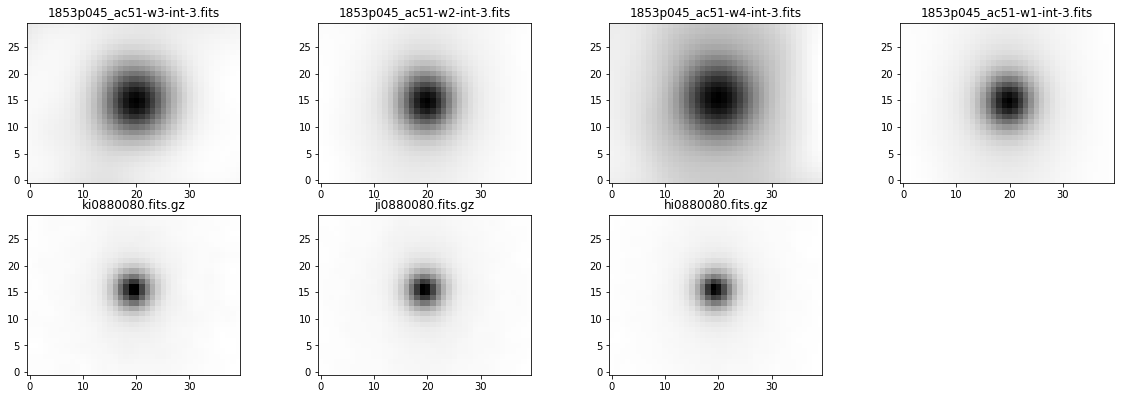

In [121]:
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy.wcs import wcs
import astropy.io.fits as fits
import numpy as np
import os
from astropy.io.fits import getdata, getheader

fig = plt.figure(figsize=(20,10))
i = 0
for entry in downloaded_images:
    filename = entry['imagename']
    title = filename
    data = getdata(filename, 0)
    header = getheader(filename, 0)
    w = wcs.WCS(header)

    position = SkyCoord(ra, dec, unit = 'deg')
    cutout = Cutout2D(data, position, (30, 40), wcs=w) #shupe how do I get this into arcsec?

    ax = fig.add_subplot(3,4,i+1)
    ax.imshow(cutout.data, cmap='gray_r', origin='lower')
    ax.set_title(title)
    i = i + 1
plt.show()